<a href="https://colab.research.google.com/github/ViniciusSilveiraCampos/ViniciusSilveiraCampos/blob/main/Classifica%C3%A7%C3%A3o_Vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASSIFICAÇÃO BINARIA

## Importação das Bibliotecas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import torch.nn.functional as F

In [1]:
import torch
import torch.nn as nn

In [ ]:
torch.__version__

'2.1.0+cu121'

In [ ]:
np.random.seed(123)
torch.manual_seed(123)

## Base de Dados

**1**) Álcool

2) Ácido málico

3) Cinza

4) Alcalinidade da cinza

5) Magnésio

6) Fenóis totais

7) Flavonoides

8) Fenóis não flavonoides

9) Proantocianidinas

10) Intensidade de cor

11) Matiz

12) OD280/OD315 dos vinhos diluídos

13) Proline

In [ ]:
CLASSES = ['CLASSE', 'ÁLCOOL', 'ÁCIDO_MÁLICO', 'CINZA','ALCALINIDADE_DA_CINZA', 'MAGNÉSIO', 'FENÓIS_TOTAIS', 'FLAVONOIDES', 'FÉNOIS_NÃO_FLAVONOIDES', 'PROANTOCIANIDINAS',
          'INTENSIDADE_DE_COR', 'MATIZ', 'DILUÍDOS', 'PROLINE']

In [ ]:
a = open('wine.data', 'r')

In [ ]:
items = [item.strip('\n').split(',') for item in a]

In [ ]:
DADOS = pd.DataFrame(np.array(items),
                   columns=CLASSES)

<Axes: xlabel='CLASSE', ylabel='count'>

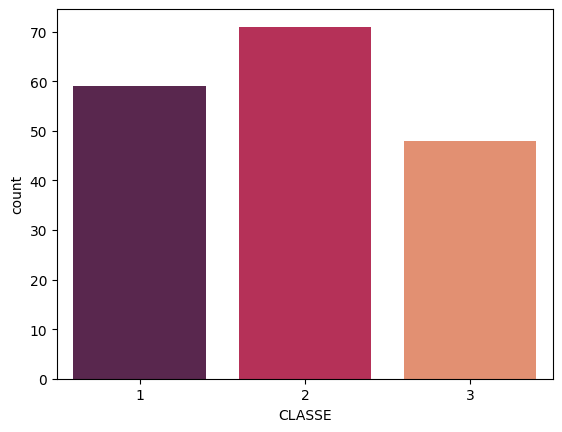

In [ ]:
sns.countplot(DADOS, x='CLASSE', palette='rocket')

In [ ]:
Classes = DADOS['CLASSE']
Base = DADOS.drop(columns='CLASSE')

In [ ]:
encoder = LabelEncoder()
Classes = encoder.fit_transform(Classes)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
np.unique(Classes)

array([0, 1, 2])

In [ ]:
previsores_teste, previsores_treinamento, classe_teste, classe_treinamento = train_test_split(Base, Classes, test_size=0.25)

In [ ]:
previsores_treinamento = np.array(previsores_treinamento.values, dtype= np.float32)

In [ ]:
previsores_treinamento = torch.tensor(previsores_treinamento, dtype = torch.float)
classe_treinamento = torch.tensor(classe_treinamento, dtype=torch.long)

### CONSTRUÇÃO DO MODELO

In [ ]:
# 13 atributos -> 8 -> 8 -> 3
classificador = nn.Sequential(
    nn.Linear(13, 8, bias=True),
    nn.ReLU(),
    nn.Linear(8, 8, bias=True),
    nn.ReLU(),
    nn.Linear(8, 3, bias=True),
    )

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
Optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

In [ ]:
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

### Treinamento do Modelo

In [ ]:
for epoca in range(2000):
  running_loss = 0.
  running_accuracy = 0

  for data in train_loader:
    inputs, labels = data

    Optimizer.zero_grad()

    outputs = classificador.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()

    outputs = F.softmax(outputs)
    top_p, top_class = outputs.topk(k=1, dim= 1)

    equals = top_class == labels.view(*top_class.shape)

    running_accuracy += torch.mean(equals.type(torch.float))
    Optimizer.step()
    running_loss += loss.item()

  print(f'Época: {epoca+1} // Perda {running_loss/len(train_loader)} // Média {running_accuracy/len(train_loader)}')

Época: 1 // Perda 14.266887855529784 // Média 0.4399999976158142
Época: 2 // Perda 10.995984768867492 // Média 0.48000001907348633
Época: 3 // Perda 12.187906742095947 // Média 0.4399999976158142


<ipython-input-27-efb198b80df7>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = F.softmax(outputs)


Época: 4 // Perda 9.38507890701294 // Média 0.4399999976158142
Época: 5 // Perda 8.535536003112792 // Média 0.5
Época: 6 // Perda 7.772820472717285 // Média 0.3800000250339508
Época: 7 // Perda 7.011216068267823 // Média 0.4399999976158142
Época: 8 // Perda 6.398324394226075 // Média 0.6000000238418579
Época: 9 // Perda 5.480438685417175 // Média 0.5600000619888306
Época: 10 // Perda 5.365943145751953 // Média 0.5
Época: 11 // Perda 4.862400102615356 // Média 0.5199999809265137
Época: 12 // Perda 4.652833366394043 // Média 0.5199999809265137
Época: 13 // Perda 3.6377484798431396 // Média 0.5400000214576721
Época: 14 // Perda 3.2910002708435058 // Média 0.5400000214576721
Época: 15 // Perda 3.1298607349395753 // Média 0.5199999809265137
Época: 16 // Perda 2.812377142906189 // Média 0.48000001907348633
Época: 17 // Perda 2.541089653968811 // Média 0.5200000405311584
Época: 18 // Perda 2.2264781951904298 // Média 0.5600000619888306
Época: 19 // Perda 1.9719744443893432 // Média 0.52000004

## Avaliação

In [ ]:
classificador.eval()

Sequential(
  (0): Linear(in_features=13, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=3, bias=True)
)

In [ ]:
previsores_teste = np.array(previsores_teste.values, dtype= np.float32)
previsores_teste = torch.tensor(previsores_teste, dtype=torch.float)

In [ ]:
previsores = classificador(previsores_teste)

In [ ]:
F.softmax(previsores)

<ipython-input-31-55b8446e1a4c>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(previsores)


tensor([[9.6202e-01, 3.7465e-02, 5.1435e-04],
        [1.0000e+00, 7.3833e-11, 1.0294e-09],
        [1.5364e-06, 9.9971e-01, 2.8822e-04],
        [1.1486e-01, 8.8291e-01, 2.2268e-03],
        [1.2944e-02, 9.8542e-01, 1.6335e-03],
        [2.7191e-10, 9.9999e-01, 1.2399e-05],
        [7.0307e-08, 4.7676e-06, 1.0000e+00],
        [6.9277e-05, 4.0454e-12, 9.9993e-01],
        [1.1362e-07, 9.9998e-01, 1.8287e-05],
        [1.0000e+00, 5.3619e-13, 2.1718e-10],
        [3.2521e-04, 9.9782e-01, 1.8522e-03],
        [4.7479e-08, 9.9998e-01, 1.8421e-05],
        [4.2219e-06, 9.9985e-01, 1.5059e-04],
        [1.0000e+00, 2.1506e-09, 1.0666e-08],
        [1.0000e+00, 1.3937e-07, 3.7155e-07],
        [2.8808e-04, 9.9934e-01, 3.6884e-04],
        [9.9997e-01, 1.3763e-05, 1.5743e-05],
        [1.2845e-05, 9.9980e-01, 1.9043e-04],
        [1.0000e+00, 2.9947e-07, 3.9900e-07],
        [9.8481e-01, 1.4490e-02, 6.9877e-04],
        [1.0000e+00, 2.9437e-08, 2.9254e-08],
        [4.8133e-09, 1.7555e-10, 1

In [ ]:
previsores =[np.argmax(t) for t in previsores.detach().numpy()]

In [ ]:
matriz = confusion_matrix(previsores, classe_teste)
matriz

array([[45,  1,  0],
       [ 3, 53,  1],
       [ 0,  3, 27]])

<Axes: >

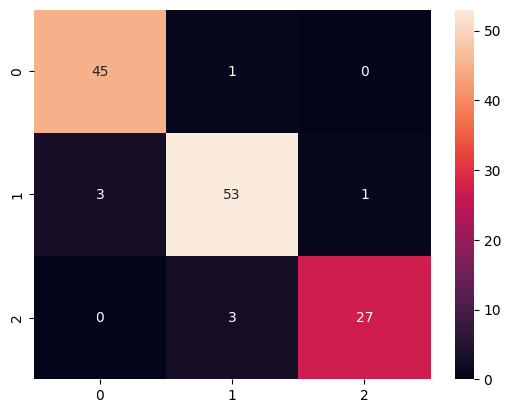

In [ ]:
sns.heatmap(matriz,annot=True)